In [ ]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
from imblearn.over_sampling import SMOTE

# Data Cleaning

In [ ]:
# Menampilkan data
data = pd.read_csv("data.csv")
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1840394341434470906,Sun Sep 29 14:12:58 +0000 2024,1,Kebijakan makan siang gratis Prabowo-Gibran me...,1840394341434470906,https://pbs.twimg.com/media/GYpk5h9bEAAGGQ5.jpg,NaN,in,NaN,0,0.0,0,https://x.com/selputtt/status/1840394341434470906,1.556552e+18,selputtt
1,1840394308849164313,Sun Sep 29 14:12:50 +0000 2024,1,Kebijakan makan siang gratis Prabowo-Gibran me...,1840394308849164313,https://pbs.twimg.com/media/GYpk3oZaYAAqtCh.jpg,NaN,in,NaN,0,0.0,0,https://x.com/selputtt/status/1840394308849164313,1.556552e+18,selputtt
2,1840377861364134285,Sun Sep 29 13:07:29 +0000 2024,0,Dengan Rp 71 triliun program makan siang grati...,1840377861364134285,https://pbs.twimg.com/media/GYpV6VkawAAnkt6.jpg,NaN,in,"Djakarta,Indonesia",0,0.0,0,https://x.com/thanzhunk/status/184037786136413...,3.125090e+08,thanzhunk
3,1840377816250249405,Sun Sep 29 13:07:18 +0000 2024,0,Program ini bukan hanya soal gizi anak-anak ta...,1840377816250249405,https://pbs.twimg.com/media/GYpV3uaaAAErMpp.jpg,NaN,in,"Djakarta,Indonesia",0,0.0,0,https://x.com/thanzhunk/status/184037781625024...,3.125090e+08,thanzhunk
4,1840377785392759143,Sun Sep 29 13:07:11 +0000 2024,0,Makan siang gratis untuk anak-anak manfaat bah...,1840377785392759143,https://pbs.twimg.com/media/GYpV17AawAAW_sp.jpg,NaN,in,"Djakarta,Indonesia",0,0.0,0,https://x.com/thanzhunk/status/184037778539275...,3.125090e+08,thanzhunk


In [ ]:
# Untuk mengambil kolom yang diperlukan
data = data[['created_at', 'full_text']]
data.head()

,created_at,full_text
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...


In [ ]:
data.shape

(1641, 2)

In [ ]:
# Untuk memeriksa dan menghapus data yang duplikat
data.drop_duplicates(inplace=True)
data.shape

(1191, 2)

In [ ]:
# Untuk memeriksa dan menghapus data null
data = data.dropna()

In [ ]:
data.shape

(1190, 2)

In [ ]:
# Membersihkan mention username
def remove_mention(text):
    text = re.sub(r'@\w+', '', text)
    return text

data['clean_tweet'] = data['full_text'].apply(remove_mention)
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak-anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak-anak manfaat bah...


In [ ]:
# Membersihkan retweet
def remove_retweet(text):
    text = re.sub(r'RT\s', '', text)
    return text

data['clean_tweet'] = data['clean_tweet'].apply(remove_retweet)
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak-anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak-anak manfaat bah...


In [ ]:
def remove_urls(text):
    # Menggunakan regex untuk menemukan dan menghapus pola URL
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: remove_urls(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak-anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak-anak manfaat bah...


In [ ]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

data['clean_tweet'] = data['clean_tweet'].apply(remove_html_tags)
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo-Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak-anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak-anak manfaat bah...


In [ ]:
# remove simbol
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    return text

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: remove(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak anak manfaat bah...


In [ ]:
# Convertion Emoticon to Words

# Kamus emotikon ke kata-kata dalam bahasa Indonesia
emoticon_dict = {
    ":)": "senyum",
    ":-)": "senyum",
    ":(": "sedih",
    ":-(": "sedih",
    ":D": "senyum lebar",
    ":-D": "senyum lebar",
    ":P": "muka usil",
    ";)": "kedip",
    "<3": "hati",
    ":o": "terkejut",
    ":O": "terkejut"
    # Tambahkan lebih banyak emotikon sesuai kebutuhan
}

def convert_emoticons_to_words(text):
    # Ubah setiap emotikon ke kata-kata menggunakan kamus
    for emoticon, word in emoticon_dict.items():
        text = re.sub(re.escape(emoticon), word, text)
    return text

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: convert_emoticons_to_words(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak anak manfaat bah...


In [ ]:
!pip install emoji
!pip install emoji-data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Convertion Emoji to Word

import emoji

def convert_emoji_to_words(text):
    # Mengonversi emoji menjadi teks deskriptif
    return emoji.demojize(text, language="id")  # "id" untuk bahasa Indonesia

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: convert_emoji_to_words(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak anak manfaat bah...


In [ ]:
# remove punctuation

import string

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: remove_punct(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,Kebijakan makan siang gratis Prabowo Gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,Dengan Rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,Program ini bukan hanya soal gizi anak anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,Makan siang gratis untuk anak anak manfaat bah...


In [ ]:
# Lowercasing
def to_lowercase(text):
    # Mengonversi teks menjadi huruf kecil
    return text.lower()

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: to_lowercase(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,kebijakan makan siang gratis prabowo gibran me...
1,Sun Sep 29 14:12:50 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,kebijakan makan siang gratis prabowo gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,dengan rp 71 triliun program makan siang grati...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program ini bukan hanya soal gizi anak anak ta...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis untuk anak anak manfaat bah...


In [ ]:
data = data.drop_duplicates(subset=['clean_tweet'])

In [ ]:
data.shape

(857, 3)

# Pre-Processing

In [ ]:
# Kamus normalisasi untuk kata-kata gaul atau typo
normalization_dict = {
    "gimana": "bagaimana",
    "gpp": "tidak apa-apa",
    "gapapa": "tidak apa-apa",
    "gk": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "bgt": "banget",
    "bgt": "sekali",
    "sy": "saya",
    "aq": "aku",
    "udh": "sudah",
    "sdh": "sudah",
    "sdh": "sudah",
    "aja": "saja",
    "aj": "saja",
    "sm": "sama",
    "sama2": "sama-sama",
    "kpn": "kapan",
    "kalo": "kalau",
    "klo": "kalau",
    "trs": "terus",
    "trus": "terus",
    "tp": "tapi",
    "tpi": "tapi",
    "tapi": "tetapi",
    "dgn": "dengan",
    "dg": "dengan",
    "dr": "dari",
    "dri": "dari",
    "utk": "untuk",
    "untk": "untuk",
    "ya": "iya",
    "iyaa": "iya",
    "iye": "iya",
    "jg": "juga",
    "jga": "juga",
    "jd": "jadi",
    "jdi": "jadi",
    "mn": "mana",
    "mna": "mana",
    "km": "kamu",
    "mw": "mau",
    "mau": "ingin",
    "yng": "yang",
    "bs": "bisa",
    "bisa": "dapat",
    "udh": "sudah",
    "blm": "belum",
    "blm": "belum",
    "bnyk": "banyak",
    "bnyak": "banyak",
    "sdng": "sedang",
    "org": "orang",
    "krn": "karena",
    "karna": "karena",
    "kek": "seperti",
    "kyk": "seperti",
    "kayak": "seperti",
    "gtu": "begitu",
    "gini": "begini",
    "lu": "kamu",
    "loe": "kamu",
    "gua": "aku",
    "gue": "aku",
    "apaan": "apa",
    "apaansih": "apa sih",
    "knapa": "kenapa",
    "ngapain": "mengapa",
    "dpt" : "dapat",
    "sih" : "",
    "yt" : "youtube",
    "yuk": "ayo",
    "yuks": "ayo",
    "sssaja": "saja",
    "rp" : "rupiah"
}

def normalize_text(text):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

data['clean_tweet'] = data['clean_tweet'].apply(normalize_text)
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,kebijakan makan siang gratis prabowo gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,dengan rupiah 71 triliun program makan siang g...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program ini bukan hanya soal gizi anak anak te...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis untuk anak anak manfaat bah...
5,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,program makan siang gratis prabowo gibran gera...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stopword removal
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

data['clean_tweet'] = data['clean_tweet'].apply(remove_stopwords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,kebijakan makan siang gratis prabowo gibran me...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,rupiah 71 triliun program makan siang gratis d...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program gizi anak anak pemberdayaan petani pet...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis anak anak manfaat bahan pan...
5,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,program makan siang gratis prabowo gibran gera...


In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

data['clean_tweet'] = data['clean_tweet'].apply(tokenize_text)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,"[kebijakan, makan, siang, gratis, prabowo, gib..."
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,"[rupiah, 71, triliun, program, makan, siang, g..."
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,"[program, gizi, anak, anak, pemberdayaan, peta..."
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,"[makan, siang, gratis, anak, anak, manfaat, ba..."
5,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,"[program, makan, siang, gratis, prabowo, gibra..."


In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

data['clean_tweet'] = data['clean_tweet'].apply(stem_text)
data.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.4 MB/s eta 0:00:00


,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,"[bijak, makan, siang, gratis, prabowo, gibran,..."
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,"[rupiah, 71, triliun, program, makan, siang, g..."
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,"[program, gizi, anak, anak, daya, tani, ternak..."
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,"[makan, siang, gratis, anak, anak, manfaat, ba..."
5,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,"[program, makan, siang, gratis, prabowo, gibra..."


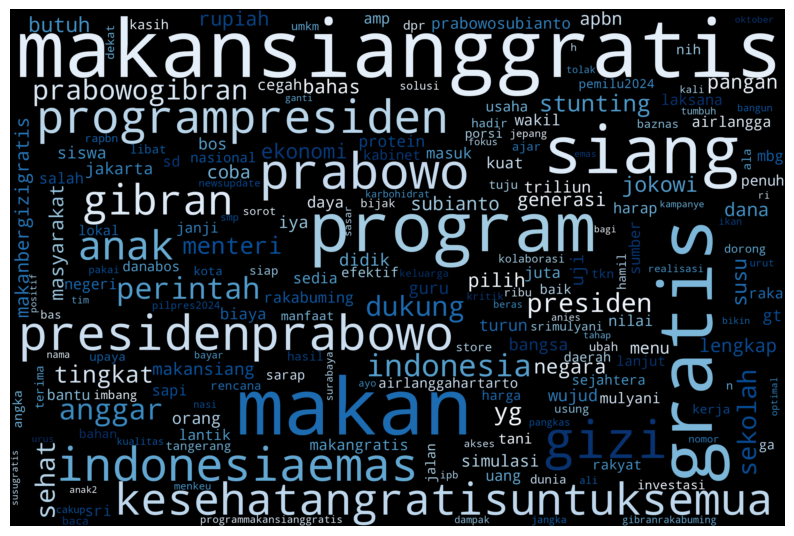

In [ ]:
# Visualisasi kata yang sering muncul

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk membuat dan menampilkan WordCloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Menghilangkan sumbu
    plt.show()

# Menggabungkan semua kata dalam kolom 'clean_tweet' yang sudah berupa list
all_words = ' '.join(' '.join(tweet) for tweet in data['clean_tweet'])

# Membuat WordCloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Plot WordCloud
plot_cloud(wordcloud)

In [ ]:
# Gabungkan daftar kata menjadi string
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join(x))
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,bijak makan siang gratis prabowo gibran milik ...
2,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,rupiah 71 triliun program makan siang gratis d...
3,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program gizi anak anak daya tani ternak indone...
4,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis anak anak manfaat bahan pan...
5,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,program makan siang gratis prabowo gibran gera...


In [ ]:
data.to_csv('data_clean.csv', index=False)

# Labeling Data

In [ ]:
data = pd.read_csv("data_clean.csv")
data.head()

,created_at,full_text,clean_tweet
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,bijak makan siang gratis prabowo gibran milik ...
1,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,rupiah 71 triliun program makan siang gratis d...
2,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program gizi anak anak daya tani ternak indone...
3,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis anak anak manfaat bahan pan...
4,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,program makan siang gratis prabowo gibran gera...


In [ ]:
data.shape

(857, 3)

In [ ]:
# Load lexicon files
def load_lexicon(file_path):
    """Load lexicon TSV file and return as a dictionary."""
    lexicon_df = pd.read_csv(file_path, sep='\t')
    return dict(zip(lexicon_df['word'], lexicon_df['weight']))

negative_lexicon = load_lexicon('negative.tsv')
positive_lexicon = load_lexicon('positive.tsv')

# Merge lexicons
lexicon = {**positive_lexicon, **negative_lexicon}

def analyze_sentiment(text):
    words = text.split()  # Split text into words
    sentiment_score = 0

    for word in words:
        sentiment_score += lexicon.get(word.lower(), 0)  # Look up word in lexicon, default to 0

    if sentiment_score > 0:
        sentiment = "Positif"
    elif sentiment_score < 0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"
    return sentiment

# Labeling data
data['Sentiment'] = data['clean_tweet'].apply(analyze_sentiment)
data.to_csv('data_label.csv', index=False)
data.head()

,created_at,full_text,clean_tweet,Sentiment
0,Sun Sep 29 14:12:58 +0000 2024,Kebijakan makan siang gratis Prabowo-Gibran me...,bijak makan siang gratis prabowo gibran milik ...,Positif
1,Sun Sep 29 13:07:29 +0000 2024,Dengan Rp 71 triliun program makan siang grati...,rupiah 71 triliun program makan siang gratis d...,Positif
2,Sun Sep 29 13:07:18 +0000 2024,Program ini bukan hanya soal gizi anak-anak ta...,program gizi anak anak daya tani ternak indone...,Negatif
3,Sun Sep 29 13:07:11 +0000 2024,Makan siang gratis untuk anak-anak manfaat bah...,makan siang gratis anak anak manfaat bahan pan...,Negatif
4,Sun Sep 29 13:07:03 +0000 2024,Program Makan Siang Gratis Prabowo-Gibran gera...,program makan siang gratis prabowo gibran gera...,Positif


In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')

# Definisikan tanggal pelantikan
tanggal_pelantikan = pd.Timestamp('2024-10-20', tzinfo=pytz.UTC)

# Pisahkan data sebelum dan sesudah pelantikan
sebelum_pelantikan = data[data['created_at'] < tanggal_pelantikan]
sesudah_pelantikan = data[data['created_at'] >= tanggal_pelantikan]

# Simpan data sebelum dan sesudah pelantikan ke CSV
sebelum_pelantikan.to_csv('sebelum_pelantikan_label.csv', index=False)
sesudah_pelantikan.to_csv('sesudah_pelantikan_label.csv', index=False)

<ipython-input-31-2ace9d392677>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')


In [ ]:
sebelum_pelantikan.shape

(660, 4)

In [ ]:
sesudah_pelantikan.shape

(197, 4)

# Visualisasi

<ipython-input-34-2f527c10b2f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel', ax=ax)


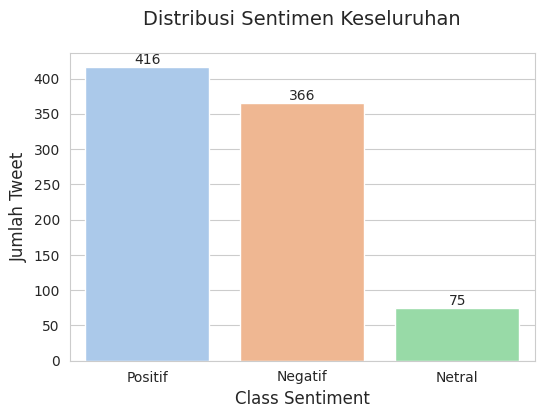

In [ ]:
sentiment_count = data['Sentiment'].value_counts()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel', ax=ax)
plt.title('Distribusi Sentimen Keseluruhan', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

<ipython-input-38-114934a54c74>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sebelum_pelantikan, palette='pastel')
<ipython-input-38-114934a54c74>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sesudah_pelantikan, palette='pastel')


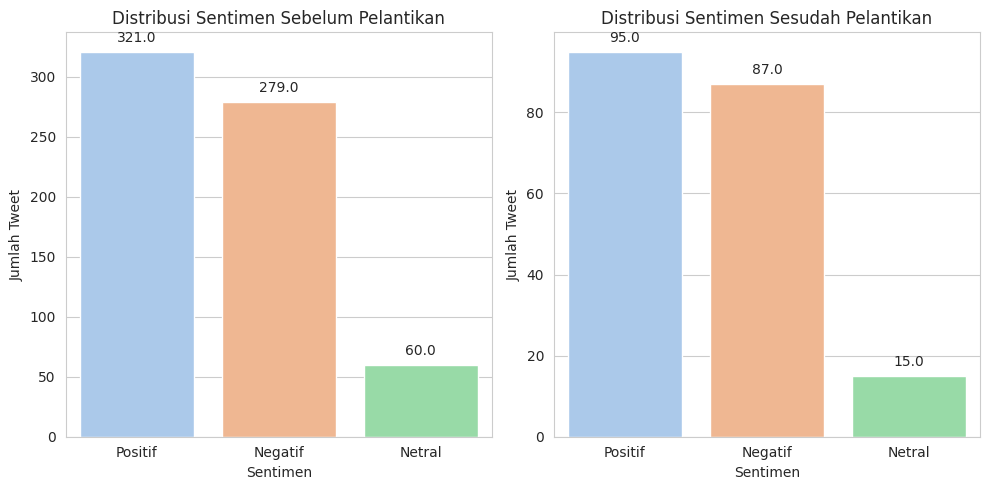

In [ ]:
# Perbandingan Sebelum dan Sesudah Pelantikan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', data=sebelum_pelantikan, palette='pastel')
plt.title('Distribusi Sentimen Sebelum Pelantikan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', data=sesudah_pelantikan, palette='pastel')
plt.title('Distribusi Sentimen Sesudah Pelantikan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Modeling

In [ ]:
X = data['clean_tweet']
y = data['Sentiment']

In [ ]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# SMOTE untuk balancing data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<ipython-input-45-eb2505ab9e17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count_resampled.index, y=sentiment_count_resampled.values, palette='pastel', ax=ax)


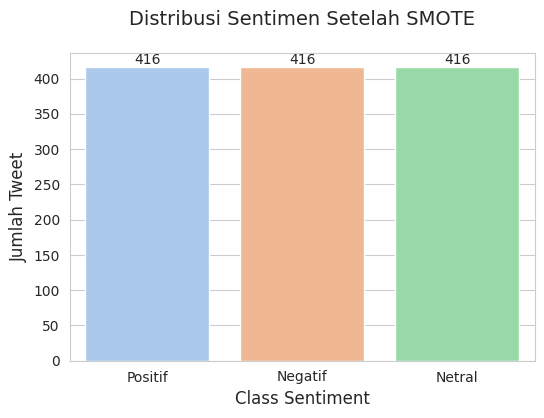

In [ ]:
y_resampled = pd.Series(y_resampled) # convert to pandas series to use value_counts

sentiment_count_resampled = y_resampled.value_counts()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=sentiment_count_resampled.index, y=sentiment_count_resampled.values, palette='pastel', ax=ax)
plt.title('Distribusi Sentimen Setelah SMOTE', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
for i, count in enumerate(sentiment_count_resampled.values):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')
plt.show()

In [ ]:
# Split data train test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85        88
      Netral       0.93      1.00      0.96        78
     Positif       0.88      0.82      0.85        84

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



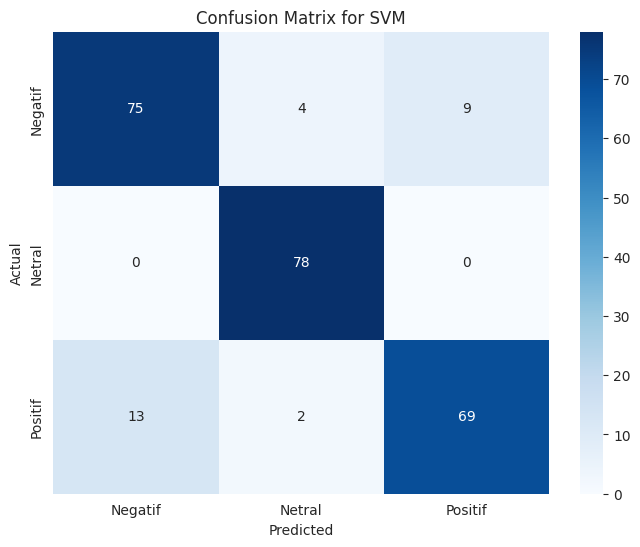

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1)

# Training model
svm_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
def text_preprocessing_process(text):
    text = remove_mention(text)
    text = remove_retweet(text)
    text = remove_urls(text)
    text = remove_html_tags(text)
    text = remove(text)
    text = convert_emoticons_to_words(text)
    text = convert_emoji_to_words(text)
    text = remove_punct(text)
    text = to_lowercase(text)
    text = normalize_text(text)
    text = remove_stopwords(text)
    text = tokenize_text(text)
    text = stem_text(text)
    return ' '.join(text)


In [ ]:
import pandas as pd

tweet_input = ("ahh tom kalah mah kalah wir kite mah joget oke gass waee bijak yg wleee indonesiaemas makansianggratis")
tweet_input = text_preprocessing_process(tweet_input)

def determine_sentiment(text):
    """Perform sentiment analysis on the given text based on the lexicon."""
    words = text.split()
    sentiment_score = 0
    for word in words:
        sentiment_score += lexicon.get(word.lower(), 0)

    if sentiment_score > 0:
        sentiment = "Positif"
    elif sentiment_score < 0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"
    return sentiment

print (determine_sentiment(tweet_input))

Negatif


In [ ]:
import pickle

# Save the trained SVM model
filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# Save the vectorizer
filename_vectorizer = 'tfidf_vectorizer.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb'))

In [ ]:
# prompt: streamlit

import streamlit as st
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved model and vectorizer
filename = 'svm_model.sav'
filename_vectorizer = 'tfidf_vectorizer.sav'
loaded_model = pickle.load(open(filename, 'rb'))
vectorizer = pickle.load(open(filename_vectorizer, 'rb'))


def text_preprocessing_process(text):
    # ... (your existing preprocessing function)
    return ' '.join(text)  # Ensure this returns a string


def determine_sentiment(text):
    """Perform sentiment analysis on the given text using the loaded model."""
    # Preprocess the input text
    processed_text = text_preprocessing_process(text)
    # Vectorize the processed text
    text_vectorized = vectorizer.transform([processed_text])

    # Predict using the loaded model
    prediction = loaded_model.predict(text_vectorized)[0]
    return prediction


# Streamlit app
st.title("Sentiment Analysis App")

# Input text area
tweet_input = st.text_area("Enter your tweet:", "Type your tweet here...")

# Perform sentiment analysis when a button is pressed
if st.button("Analyze"):
  sentiment = determine_sentiment(tweet_input)
  st.write(f"Sentiment: {sentiment}")
